Čia yra 2021 metų elektros vartojimo dinamikos tyrimas.

Duomenų šaltinis https://data.gov.lt/ pateikia tikėtinai reprezenatyvią imtį.

Tyrimo pradžia aprašyta 2025-01-22.

Raudonosios stulpelinės diagramos pateikiamos kiekvienai regionų grupei, parodo vartotojų skaičių kiekviename iš miesto lygio regionų. Iš jų matyti, kad mažų miestelių, priskirtų regionų grupei "kiti", vartotojai yra pasklidę po mažus miestelius. Šiame tyrime jie nagrinėjami kaip grupė, nuo jų atskyrus techninį regioną "Ignitis".

Toliau 9-iose linijinėse diagramose miesto lygio sub-reginų vartotojų, padalintų deciliais elektros sąnaudos. 

Nors korealiacija tarp decilių akivaizdi, toliau pateikiamos visų regionų kreivės 
logaritminėje skalėje ir korealiacijos tarp decilių Heatmap. Mažai tikėtina, kad GV 
būtų taip tolygiai pasiskirstę tarp visų vartotojų grupių, todėl nebandome jų nustatyti pagal suvartojimą.

Toliau 9-iose kreivėse elektros suvartojimas su vidutinių temperatūros grafiku.
Galimas ryšys tarp šių kreivių tikėtinai atsiranda dėl elektros naudojimo šildymui.

In [4]:
from datetime import datetime as dt
import os 
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Duomenų šaltinis https://data.gov.lt/datasets/1828/#resources
data_files=['2021_I_kiti','2021_I_ŠPAM','2021_I_VKK','2021_II_kiti','2021_II_ŠPAM','2021_II_VKK']
data_dir="../../../duomenys/data_gov_lt/elektra" # atsisiųsti failai
data_dir_git="./git_copy/el_vartotojai_2021_stats" # konvertuoti csv saugomi čia pat
data_file_ext="csv_" # "*.csv_" sinchronizuojama GIT
data_cols=['KWH01','KWH02','KWH03','KWH04','KWH05','KWH06','KWH07','KWH08','KWH09','KWH10','KWH11','KWH12']

print(f"Pasiruošta {dt.now().replace(microsecond=0)} \n")
# print(os.getcwd())

file_list = os.listdir(data_dir_git)
# Print elements containing 'abc', one per line
for file in file_list:
    if 'utf' in file:
        print(file)

# c:\Users\Eridas\Documents\vilniuscoding2024\git\DataScienceNotebooks\Studentai\MykolasOK
# /home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK

Pasiruošta 2025-02-02 22:47:36 

2021_II_kiti_utf-8.csv_
2021_II_VKK_utf-8.csv_
2021_II_ŠPAM_utf-8.csv_
2021_I_kiti_utf-8.csv_
2021_I_VKK_utf-8.csv_
2021_I_ŠPAM_utf-8.csv_


In [5]:
print("Duomenys iš regionų failų įkeliami į 'df_dict={}'. ",dt.now().replace(microsecond=0))

df_dict={}

for file in data_files:
    print(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',end=' ')
    df = pd.read_csv(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',sep=',',low_memory=False)
    df = df.drop_duplicates()
    # ,sep=r'[;,]',engine='python'
    print(f'>>> {df.shape} (eil. x stulp.)')
    
    df_dict[file]=df

# print('+'*50)

Duomenys iš regionų failų įkeliami į 'df_dict={}'.  2025-02-02 22:47:39
./git_copy/el_vartotojai_2021_stats/2021_I_kiti_utf-8.csv_ >>> (741646, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_I_ŠPAM_utf-8.csv_ >>> (185958, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_I_VKK_utf-8.csv_ >>> (610243, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_kiti_utf-8.csv_ >>> (761551, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_ŠPAM_utf-8.csv_ >>> (192103, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_VKK_utf-8.csv_ >>> (630432, 11) (eil. x stulp.)


In [6]:
print(list(df_dict.keys()))
# print(list(df_dict['2021_I_kiti'].keys()))
# print(list(df_dict['2021_II_kiti'].keys()))
# print(df_dict['2021_II_kiti'].head())

['2021_I_kiti', '2021_I_ŠPAM', '2021_I_VKK', '2021_II_kiti', '2021_II_ŠPAM', '2021_II_VKK']


In [7]:
print('Kiekvieno regiono mistų head-5')

# Iteruojame per kiekvieną DataFrame žodyne.
for name, df in df_dict.items():
    print(name.split('_'),str(df['REGIONAS'].unique().tolist()[:5]),sep='\n')


Kiekvieno regiono mistų head-5
['2021', 'I', 'kiti']
['Švenčionių regionas', 'Širvintų regionas', 'Šilutės regionas', 'Šilalės regionas', 'Šalčininkų regionas']
['2021', 'I', 'ŠPAM']
['Šiaulių regionas', 'Panevėžio regionas', 'Mažeikių regionas', 'Alytaus regionas']
['2021', 'I', 'VKK']
['Vilniaus regionas', 'KlaipÄ\x97dos regionas', 'Kauno regionas']
['2021', 'II', 'kiti']
['Švenčionių regionas', 'Širvintų regionas', 'Šilutės regionas', 'Šilalės regionas', 'Šalčininkų regionas']
['2021', 'II', 'ŠPAM']
['Šiaulių regionas', 'Panevėžio regionas', 'Mažeikių regionas', 'Alytaus regionas']
['2021', 'II', 'VKK']
['Vilniaus regionas', 'KlaipÄ\x97dos regionas', 'Kauno regionas']


Analizuojamų regiono vartotojų pasiskirstymo miestuose grafikai
['2021', 'I', 'kiti']
REGIONAS
Ignitis INT              141427
Marijampolės regionas     36023
Palangos regionas         34062
Gargždų regionas          29276
Trakų regionas            28713
Name: count, dtype: int64


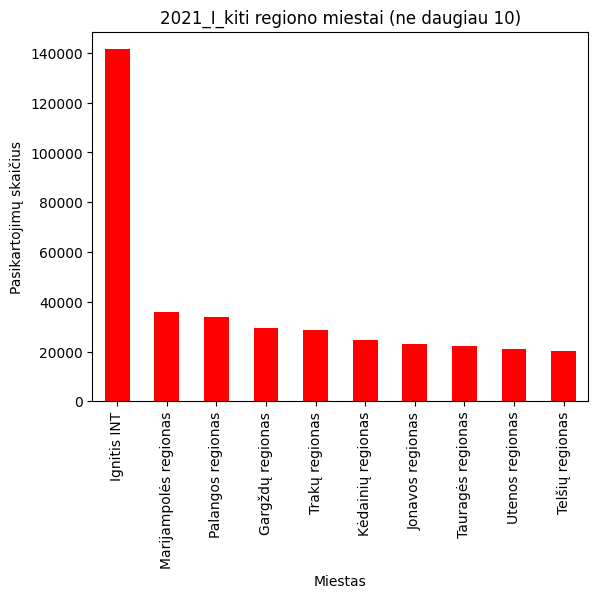

['2021', 'I', 'ŠPAM']
REGIONAS
Panevėžio regionas    63918
Šiaulių regionas      59532
Alytaus regionas      37817
Mažeikių regionas     24691
Name: count, dtype: int64


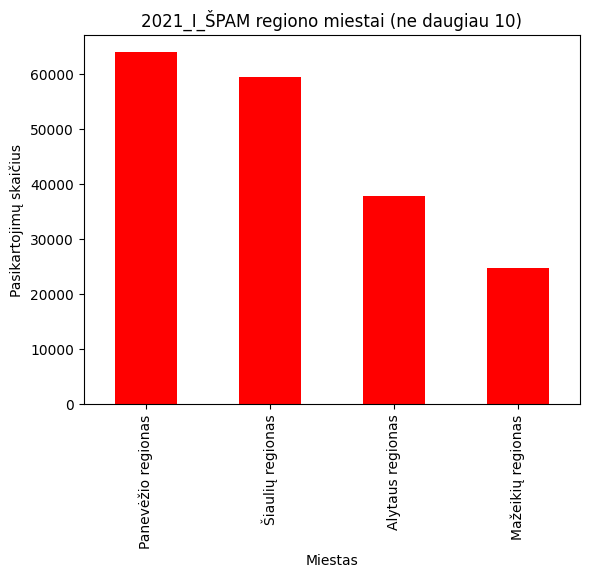

['2021', 'I', 'VKK']
REGIONAS
Vilniaus regionas      332825
Kauno regionas         196720
KlaipÄdos regionas     80698
Name: count, dtype: int64


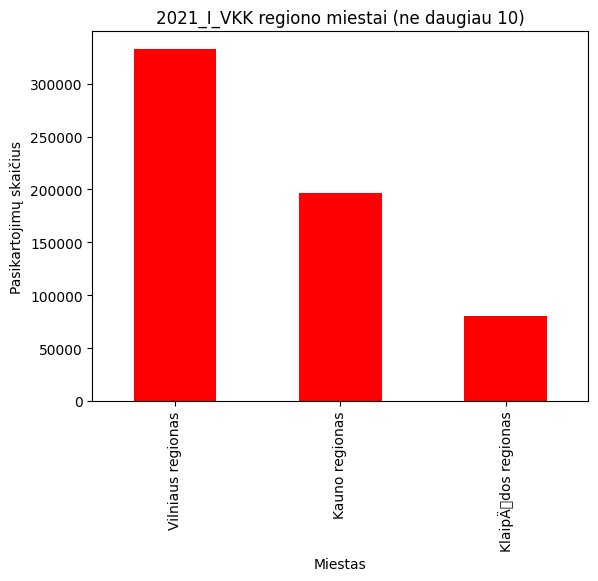

['2021', 'II', 'kiti']
REGIONAS
Ignitis INT              175991
Marijampolės regionas     37405
Palangos regionas         37027
Trakų regionas            30327
Kėdainių regionas         25489
Name: count, dtype: int64


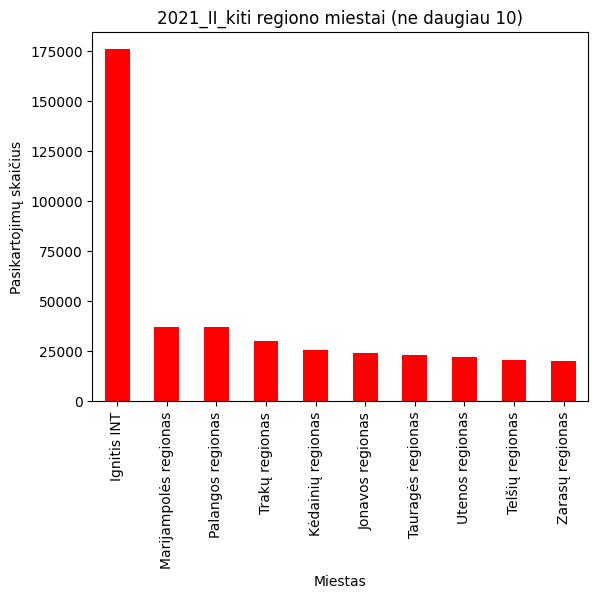

['2021', 'II', 'ŠPAM']
REGIONAS
Panevėžio regionas    66223
Šiaulių regionas      61409
Alytaus regionas      39132
Mažeikių regionas     25339
Name: count, dtype: int64


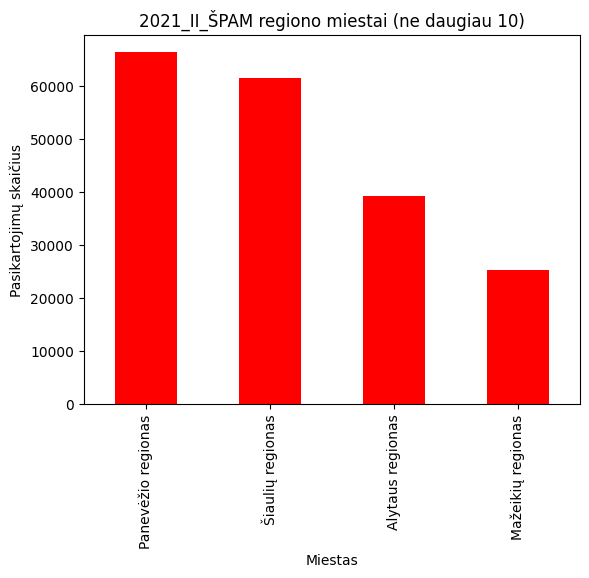

['2021', 'II', 'VKK']
REGIONAS
Vilniaus regionas      344656
Kauno regionas         203642
KlaipÄdos regionas     82134
Name: count, dtype: int64


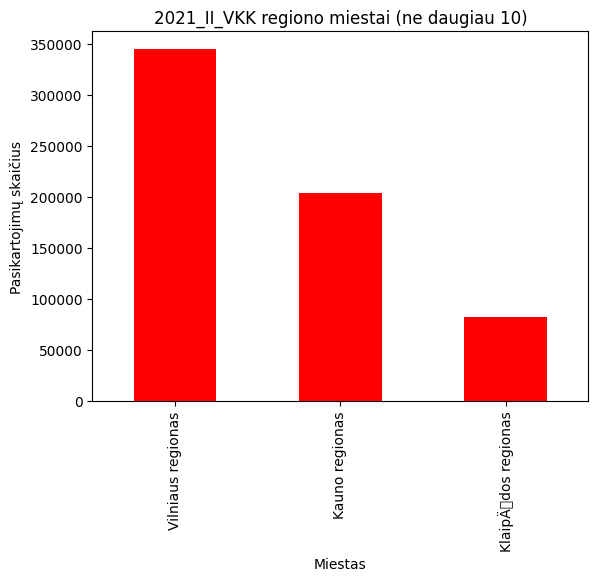

In [8]:
print('Analizuojamų regiono vartotojų pasiskirstymo miestuose grafikai')
# Iteruojame per kiekvieną DataFrame žodyne.

for name, df in df_dict.items():
    print(name.split('_'))
    # df.drop_duplicates(inplace=True)
    # print(df['REGIONAS'].unique())
    # print(len(df['REGIONAS'].unique()))
    
    # Miestų pasikartojimų skaičius. df['REGIONAS'] - miesto sub-regionas.
    region_counts = df['REGIONAS'].value_counts()

    # Spausdiname visus miestus su jų pasikartojimų skaičiumi
    print(region_counts.head(5))
    
    import matplotlib.pyplot as plt

    # Braižome miestų įrašų skaičių
    region_counts.head(10).plot(kind='bar',color='red')
    plt.xlabel('Miestas')
    plt.ylabel('Pasikartojimų skaičius')
    plt.title(f'{name} regiono miestai (ne daugiau 10)')
    plt.xticks(rotation=90)
    plt.show() 

In [9]:
print(list(df_dict.keys()))

['2021_I_kiti', '2021_I_ŠPAM', '2021_I_VKK', '2021_II_kiti', '2021_II_ŠPAM', '2021_II_VKK']


In [10]:
print(df_dict['2021_I_VKK']['REGIONAS'].unique()) # .tolist()
print(df_dict['2021_II_ŠPAM']['REGIONAS'].unique()) # .tolist()

['Vilniaus regionas' 'KlaipÄ\x97dos regionas' 'Kauno regionas']
['Šiaulių regionas' 'Panevėžio regionas' 'Mažeikių regionas'
 'Alytaus regionas']


In [11]:
import pandas as pd

# Sujungiami pusmečiai
# Didieji regionai dalinami į atskirus DF pagal miestus

new_df_dict={}

def merge_regions(df1, df2, region, invers=False):
    """
    Atrenka tik nurodyto regiono eilutes iš dviejų DF, horizontaliai sujungia,
    o jei ilgiai nesutampa – apkarpo ilgesnį DF ir praneša apie atmestas eilutes.
    
    :param df1: Pirmasis DataFrame
    :param df2: Antrasis DataFrame
    :param region: Regionas, kurį reikia atrinkti
    :return: Sujungtas DataFrame
    """
    
    print(f"{('Išskyrus ' if invers else '')}{region}")
    # Filtruojame pagal regioną
    if invers:
        df1_region = df1[df1['REGIONAS'] != region]
        df2_region = df2[df2['REGIONAS'] != region]
    else:
        df1_region = df1[df1['REGIONAS'] == region]
        df2_region = df2[df2['REGIONAS'] == region]

    columns_to_keep=data_cols+['REGIONAS'] # Ar reikia???

    # Atskirai valomi abiejų pusmečių DF
    
    len_df1=len(df1_region)
    df1_region=df1_region.filter(items=columns_to_keep)
    df1_region.drop_duplicates(inplace=True) 
    len2_df1=len(df1_region)
    discarded = len_df1-len2_df1
    print(f" I pusmetis: {len_df1} eil., pašalinti dublikatai: {discarded} ({100*(discarded)/len_df1:1.1f}%)")
    
    len_df2=len(df2_region)
    df2_region=df2_region.filter(items=columns_to_keep)
    df2_region.drop_duplicates(inplace=True) 
    len2_df2=len(df2_region)
    discarded = len_df2-len2_df2
    print(f" II pusmetis: {len_df2} eil., pašalinti dublikatai: {discarded} ({100*(discarded)/len_df2:1.1f}%)")

    # Tikriname minimalų ilgį, kad būtų vienodas ilgis
    min_len = min(len2_df1, len2_df2)

    # Apkarpome ilgesnįjį DF
    df1_region = df1_region.iloc[:min_len].reset_index(drop=True)
    df2_region = df2_region.iloc[:min_len].reset_index(drop=True)

    # Sujungiame pusmečių DF horizontalai
    df_merged = pd.concat([df1_region, df2_region], axis=1)

    # Pranešame, kiek eilučių buvo atmesta
    discarded = abs(len2_df1-len2_df2)
    print(f" Sujungta: {min_len} eil., atmestas perteklius: {discarded} ({100*discarded/min_len:1.1f}%)\n")

    return df_merged

#--- df_dict['2021_I_VKK']

new_df_dict['2021_Viln']=merge_regions(df_dict['2021_I_VKK'],df_dict['2021_II_VKK'],'Vilniaus regionas')
# print(new_df_dict['2021_Viln'].head(3),'\n')

new_df_dict['2021_Kaun']=merge_regions(df_dict['2021_I_VKK'],df_dict['2021_II_VKK'],'Kauno regionas')
# print(new_df_dict['2021_Kaun'].head(3),'\n')

new_df_dict['2021_Klaip']=merge_regions(df_dict['2021_I_VKK'],df_dict['2021_II_VKK'],'KlaipÄdos regionas')
# print(new_df_dict['2021_Klaip'].head(3),'\n')

#--- df_dict['2021_I_ŠPAM']

new_df_dict['2021_Šiaulių']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Šiaulių regionas')
# print(new_df_dict['2021_Šiaulių'].head(5),'\n')

new_df_dict['2021_Panevėžio']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Panevėžio regionas')
# print(new_df_dict['2021_Panevėžio'].head(5),'\n')

new_df_dict['2021_Alytaus']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Alytaus regionas')
# print(new_df_dict['2021_Alytaus'].head(5),'\n')

new_df_dict['2021_Mažeikių']=merge_regions(df_dict['2021_I_ŠPAM'],df_dict['2021_II_ŠPAM'],'Mažeikių regionas')
# print(new_df_dict['2021_Mažeikių'].head(5),'\n')

#--- df_dict['2021_I_kiti']

new_df_dict['2021_ignitis']=merge_regions(df_dict['2021_I_kiti'],df_dict['2021_II_kiti'],'Ignitis INT')
# print(new_df_dict['2021_ignitis'].head(5),'\n')

new_df_dict['2021_kiti']=merge_regions(df_dict['2021_I_kiti'],df_dict['2021_II_kiti'],'Ignitis INT',invers=True)
# print(new_df_dict['2021_kiti'].head(5),'\n')

Vilniaus regionas
 I pusmetis: 332825 eil., pašalinti dublikatai: 2549 (0.8%)
 II pusmetis: 344656 eil., pašalinti dublikatai: 2480 (0.7%)
 Sujungta: 330276 eil., atmestas perteklius: 11900 (3.6%)

Kauno regionas
 I pusmetis: 196720 eil., pašalinti dublikatai: 1197 (0.6%)
 II pusmetis: 203642 eil., pašalinti dublikatai: 1183 (0.6%)
 Sujungta: 195523 eil., atmestas perteklius: 6936 (3.5%)

KlaipÄdos regionas
 I pusmetis: 80698 eil., pašalinti dublikatai: 363 (0.4%)
 II pusmetis: 82134 eil., pašalinti dublikatai: 370 (0.5%)
 Sujungta: 80335 eil., atmestas perteklius: 1429 (1.8%)

Šiaulių regionas
 I pusmetis: 59532 eil., pašalinti dublikatai: 389 (0.7%)
 II pusmetis: 61409 eil., pašalinti dublikatai: 388 (0.6%)
 Sujungta: 59143 eil., atmestas perteklius: 1878 (3.2%)

Panevėžio regionas
 I pusmetis: 63918 eil., pašalinti dublikatai: 469 (0.7%)
 II pusmetis: 66223 eil., pašalinti dublikatai: 440 (0.7%)
 Sujungta: 63449 eil., atmestas perteklius: 2334 (3.7%)

Alytaus regionas
 I pusmetis: 

In [12]:
print(list(new_df_dict.keys()))
print(list(new_df_dict['2021_Viln'].keys()))
print(list(new_df_dict['2021_Alytaus'].keys()))
print(list(new_df_dict['2021_kiti'].keys()))


['2021_Viln', '2021_Kaun', '2021_Klaip', '2021_Šiaulių', '2021_Panevėžio', '2021_Alytaus', '2021_Mažeikių', '2021_ignitis', '2021_kiti']
['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06', 'REGIONAS', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12', 'REGIONAS']
['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06', 'REGIONAS', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12', 'REGIONAS']
['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06', 'REGIONAS', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12', 'REGIONAS']


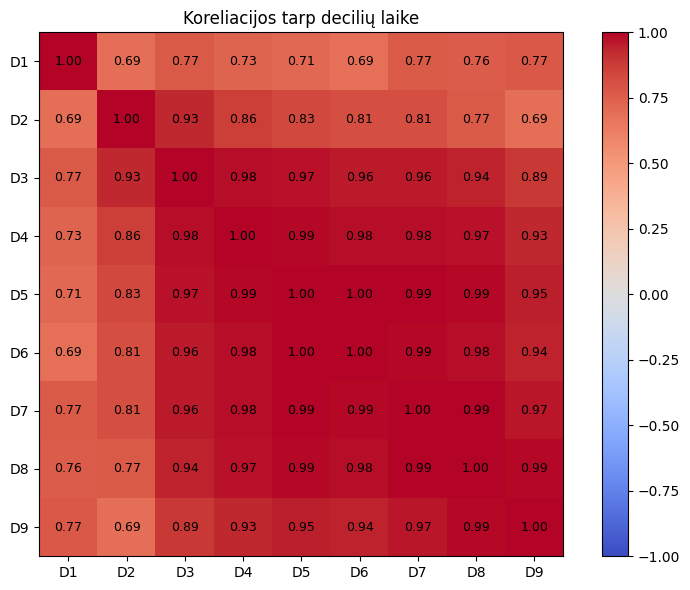

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_deciles(df):
    """Apskaičiuoja kiekvieno mėnesio duomenų decilių vidurkius"""
    decile = {}

    for month in range(1, 13):  # Pirmas pusmetis: mėnesiai 1-6
        col = f'KWH{month:02}'
        if col in df.columns:
            decile[col] = df[col].quantile([i / 10 for i in range(1, 10)]).values

    return pd.DataFrame(decile, index=[f'D{i}' for i in range(1, 10)])

def show_deciles_HM(ddf_decilesf):
    # Kadangi deciliai yra eilutėse, pirmiausia transponuojame DataFrame
    # Ir apskaičiuojame koreliacijos matricą tarp decilių
    corr_matrix = df_deciles.T.corr()

    # print("Koreliacijos matrica tarp decilių:")
    # print(corr_matrix)

    # Braižome heatmap su matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))

    # Naudojame imshow() funkciją, nurodant spalvų schemą ir fiksuojant skalę nuo -1 iki 1
    cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

    # Pridedame spalvų juostą (colorbar)
    fig.colorbar(cax, ax=ax)

    # Nustatome ašių etiketės. Kadangi indeksas yra deciliai (D1-D9), panaudojame jį.
    ticks = np.arange(len(corr_matrix.index))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr_matrix.index)
    ax.set_yticklabels(corr_matrix.index)

    # Įrašome koreliacijos reikšmes ant kiekvieno langelio su 2 skaitmenų tikslumu
    for i in range(len(corr_matrix.index)):
        for j in range(len(corr_matrix.columns)):
            ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", 
                    ha="center", va="center", color="black", fontsize=9)

    ax.set_title("Koreliacijos tarp decilių laike")
    plt.tight_layout()
    plt.show()

# Apskaičiuojame decilių vidurkius
# df_deciles = calculate_deciles(new_df_dict['2021_Viln'])
# show_deciles_HM(df_deciles)
# print(df_deciles)
# show_deciles_HM(calculate_deciles(new_df_dict['2021_Viln']))

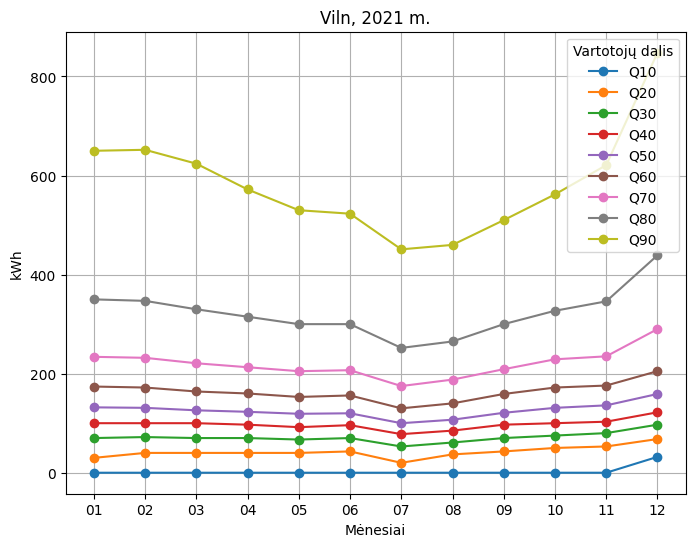

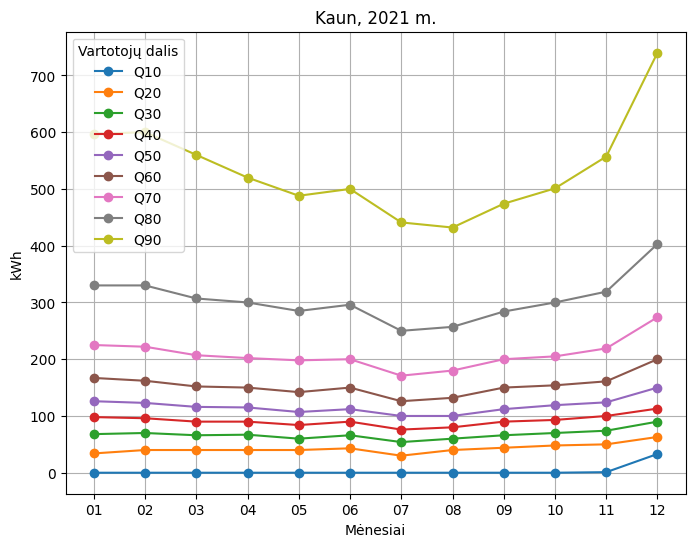

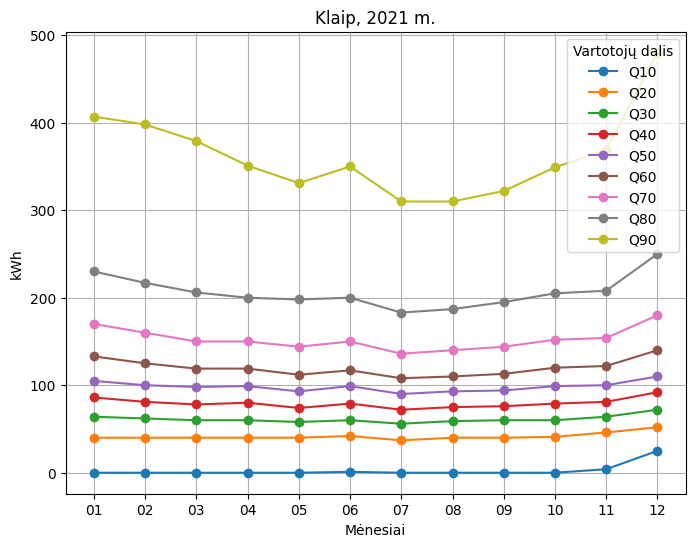

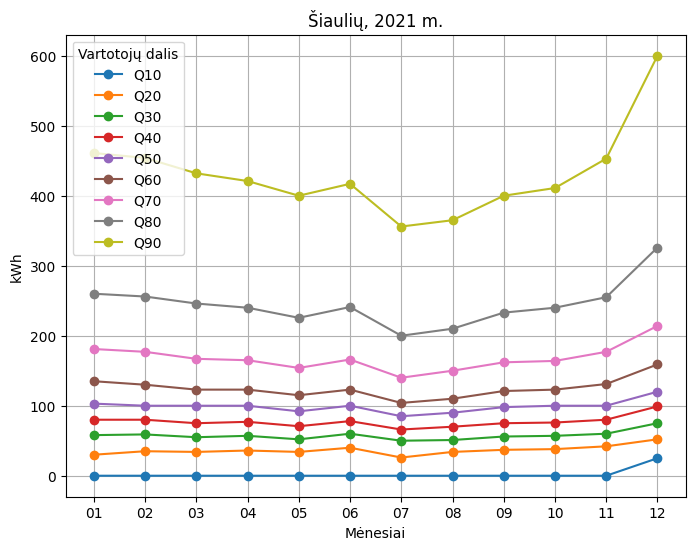

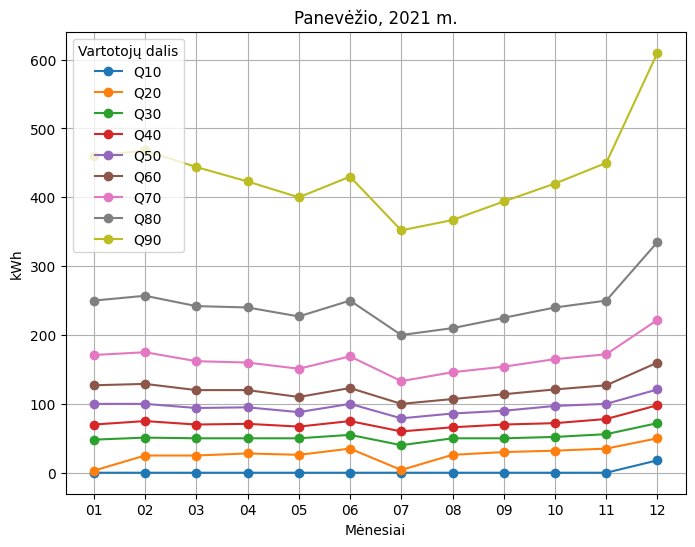

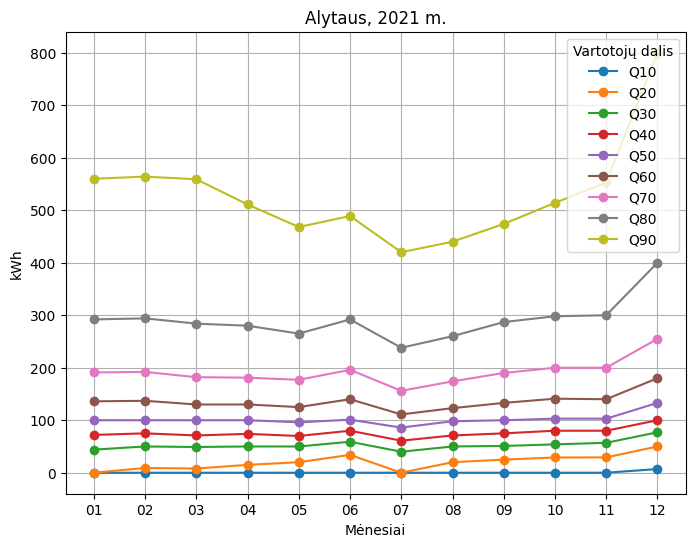

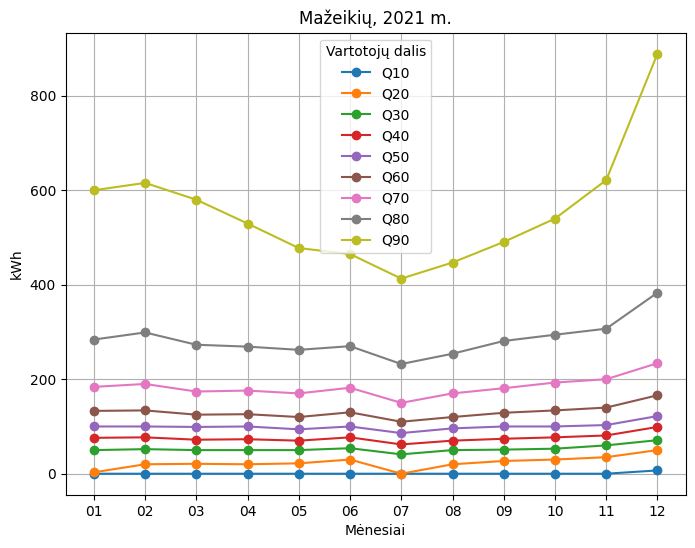

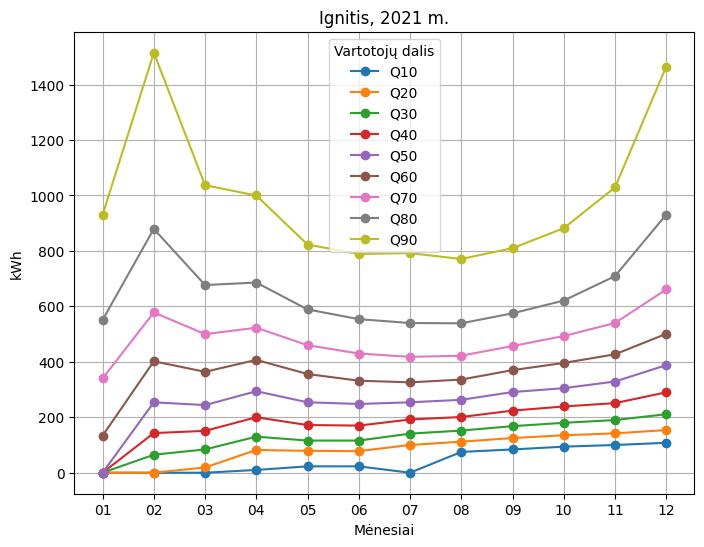

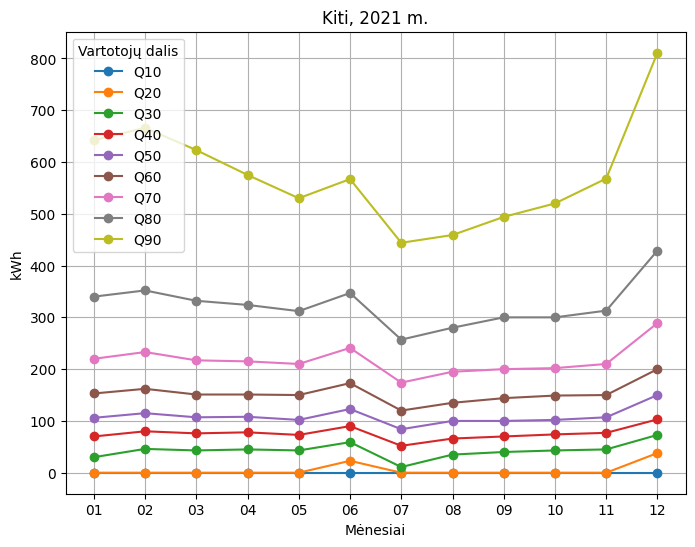

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

for name, df in new_df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KWH"
    kwh_fields = [col for col in df.columns if col.startswith('KWH')]
    
    # Sukuriame duomenų rinkinį tik su KWH laukais
    if kwh_fields:  # Jei yra tokių laukų
        kwh_data = df[kwh_fields]
        
        # Nustatome slenksčius
        quantiles = kwh_data.quantile([i / 10 for i in range(1, 10)])
        
        # Nupiešiame grafiką
        plt.figure(figsize=(8, 6))
        for quantile in quantiles.index:
            plt.plot(kwh_fields, quantiles.loc[quantile], label=f'Q{int(quantile * 100)}', marker='o')
        
        # Pritaikome grafikui pavadinimą ir ašis
        # plt.title(f"Vartotojų pasiskirstymas {name[:4]} m. {name.split('-')[1].split('_')[0]} p. {name.split('-')[1].split('_')[1]}*")
        duomenys=name.split('_')
        plt.title(f"{duomenys[1].capitalize()}, {duomenys[0]} m.")
        plt.xticks(ticks=kwh_fields, labels=[col.replace("KWH", "") for col in kwh_fields]) # !!!
        plt.xlabel("Mėnesiai")
        plt.ylabel("kWh")
        plt.legend(title="Vartotojų dalis")
        plt.grid(True)
        
        # Parodome grafiką
        plt.show()

# print('________________________\n* Regionų grupių kodai:')
# print('  VKK - Vilnius, Kaunas, Klaipėda')
# print('  ŠPAM - Šiauliai, Panevėžys, Alytus, Mažeikiai')
# print('  kiti - mažiausių Lietuvos regionų vartotojai')

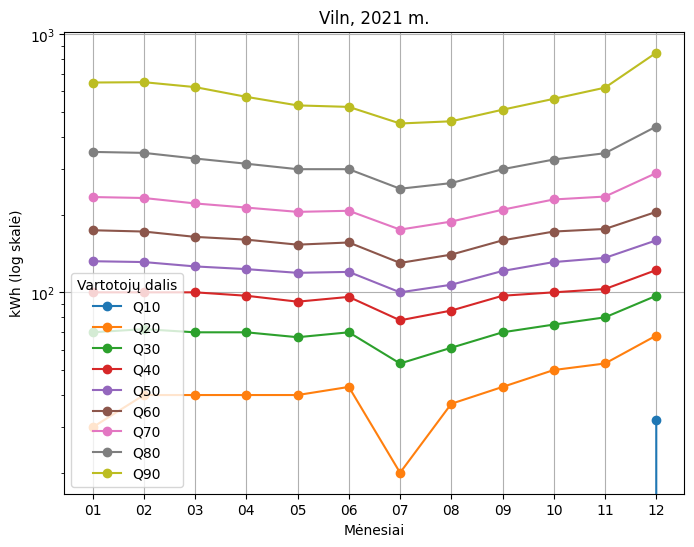

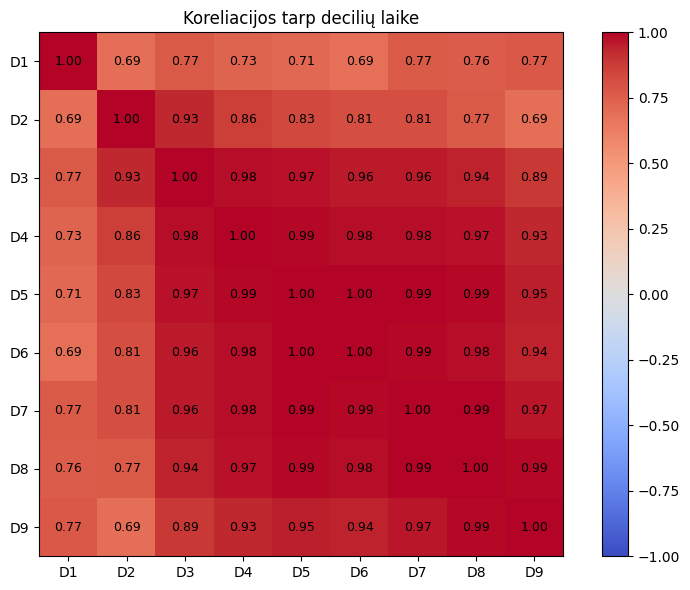

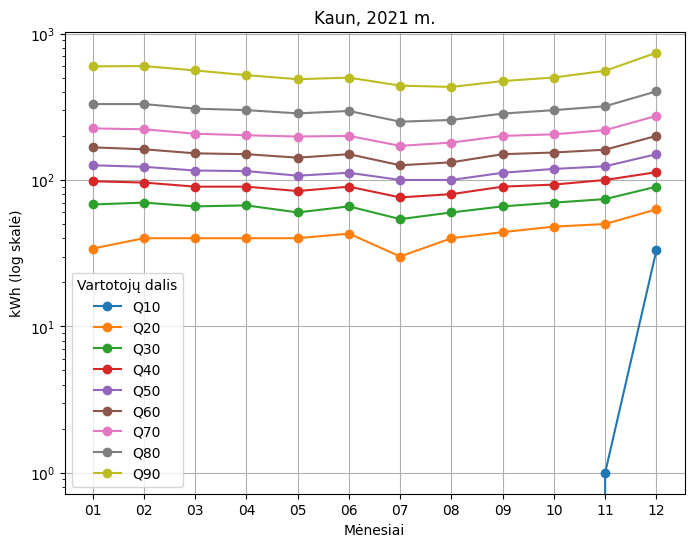

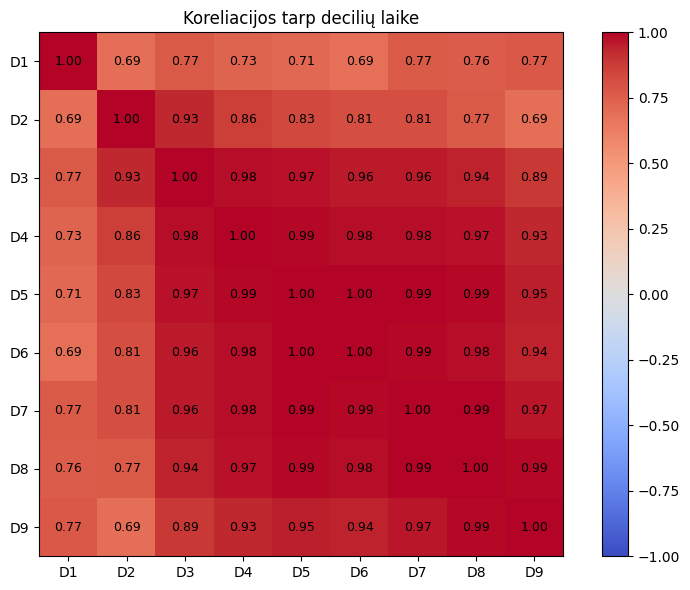

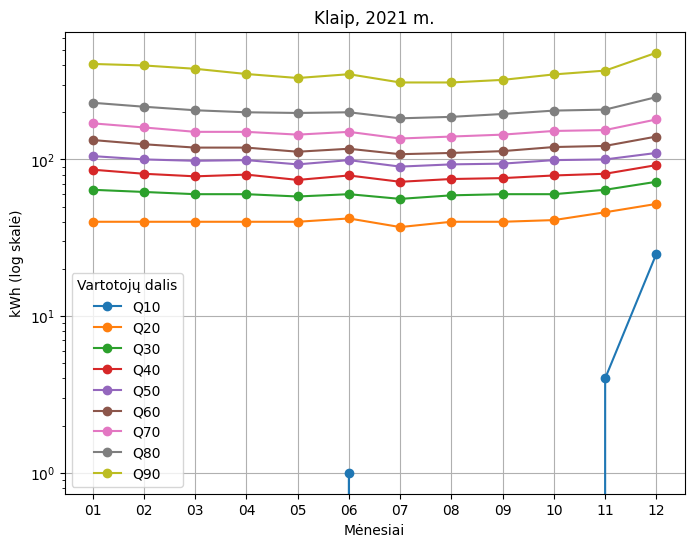

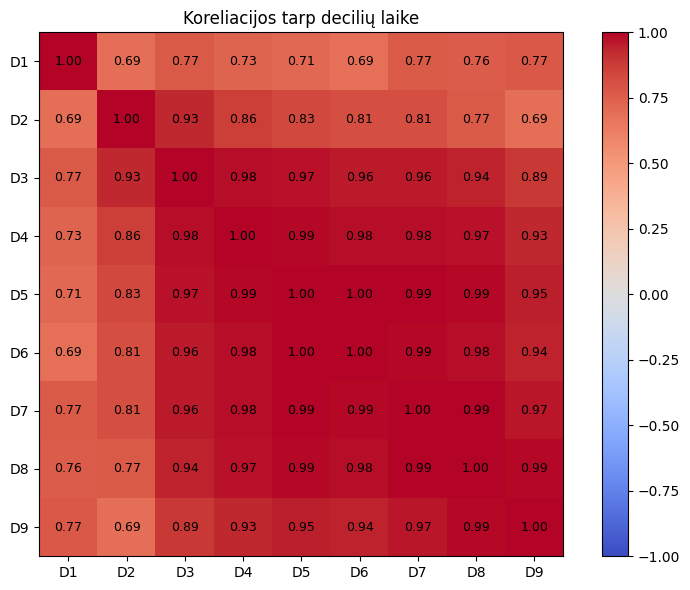

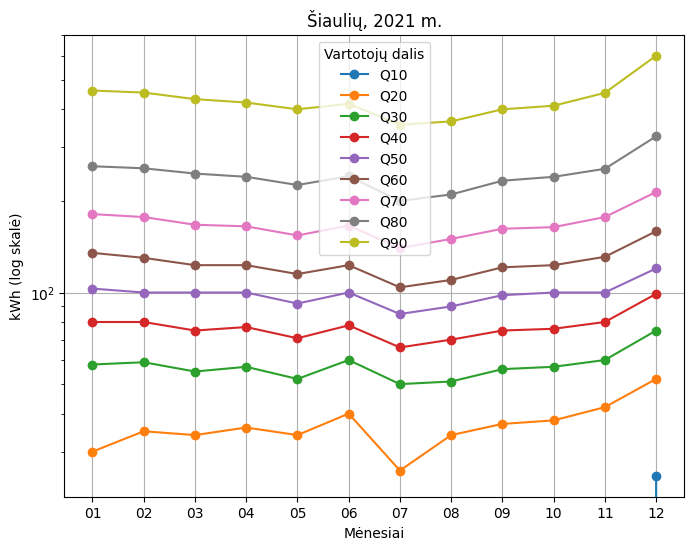

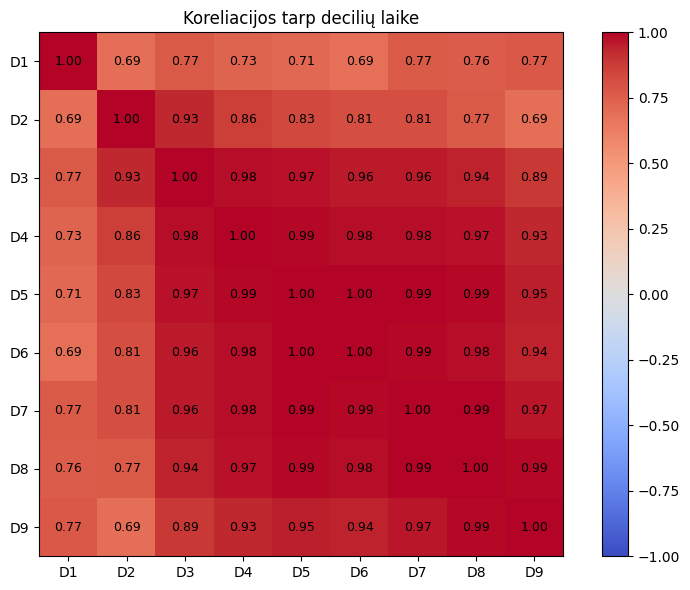

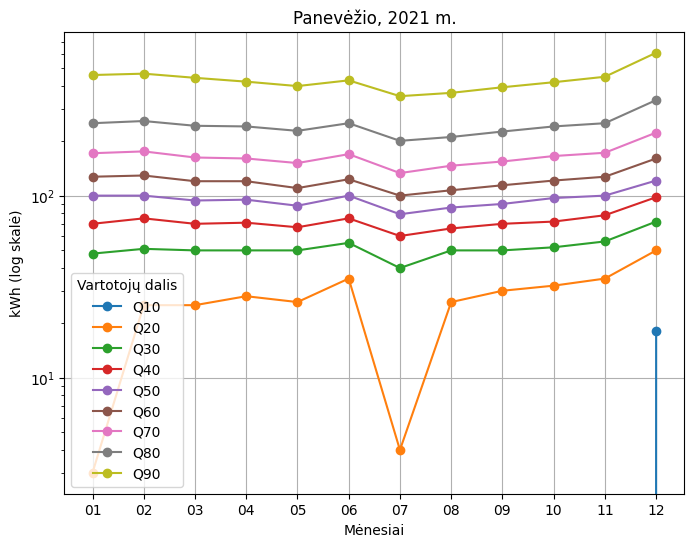

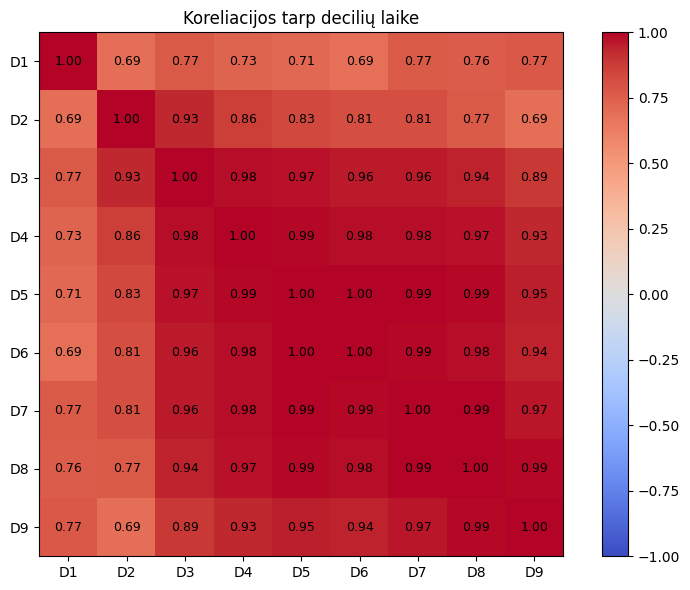

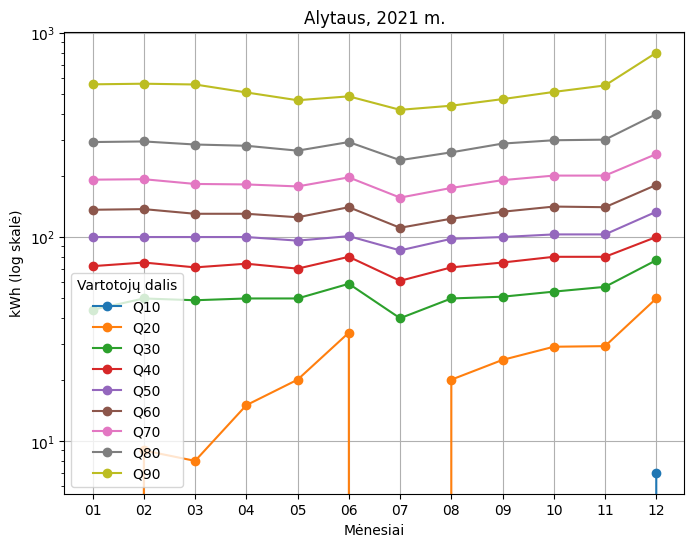

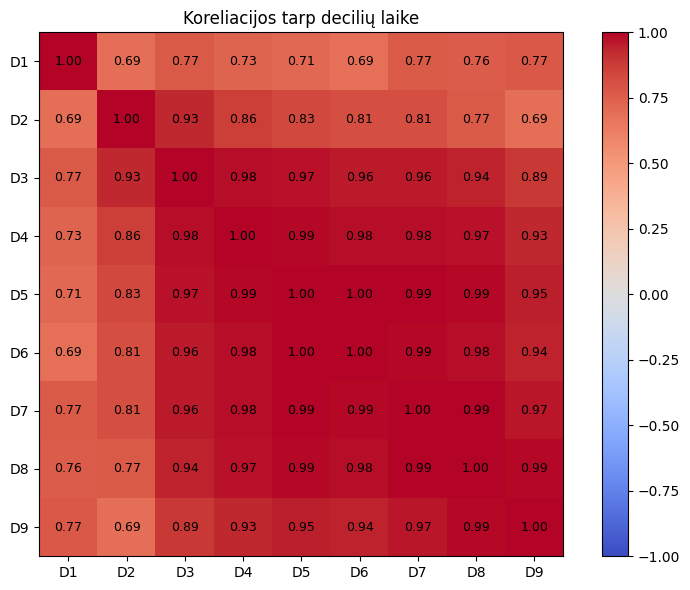

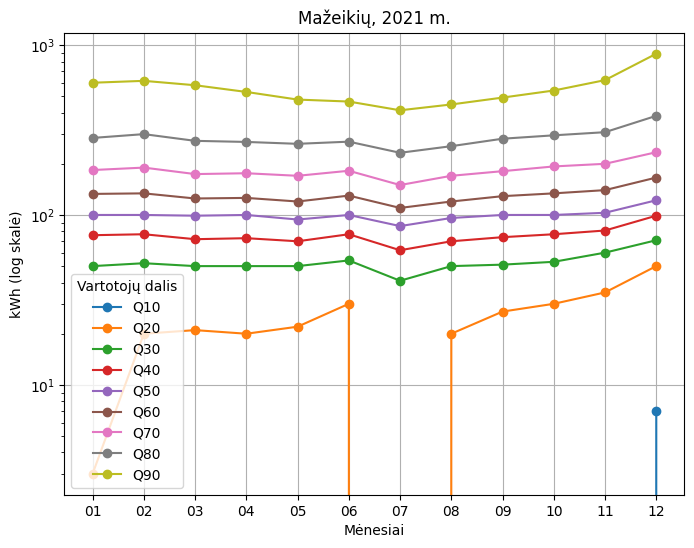

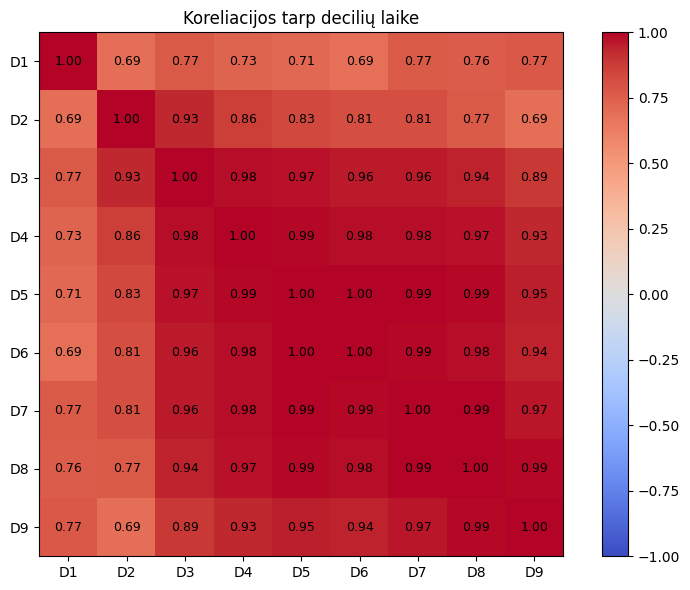

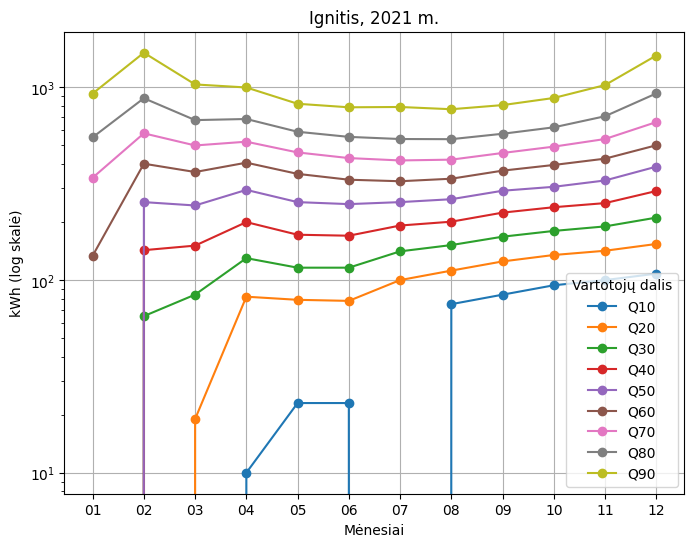

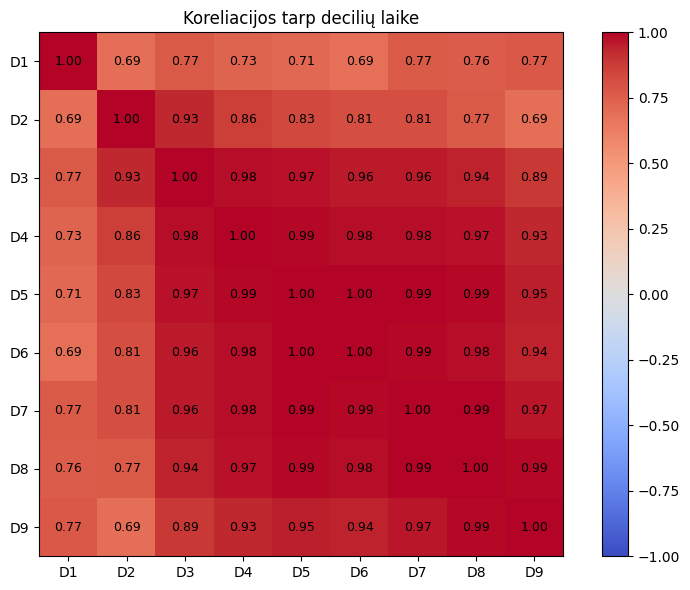

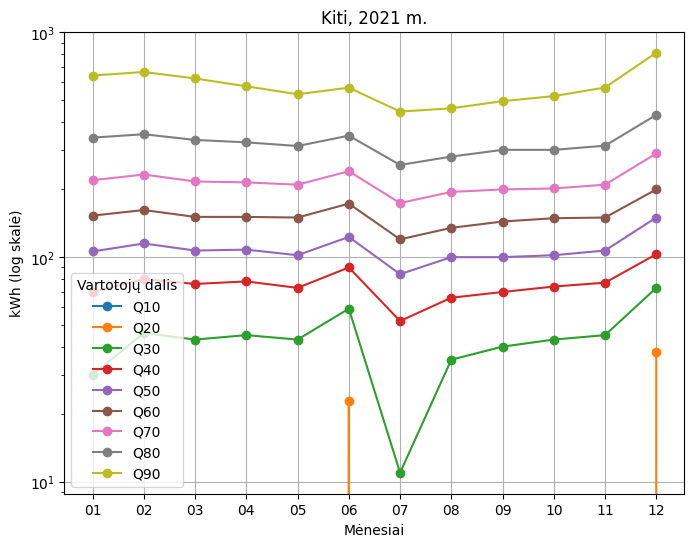

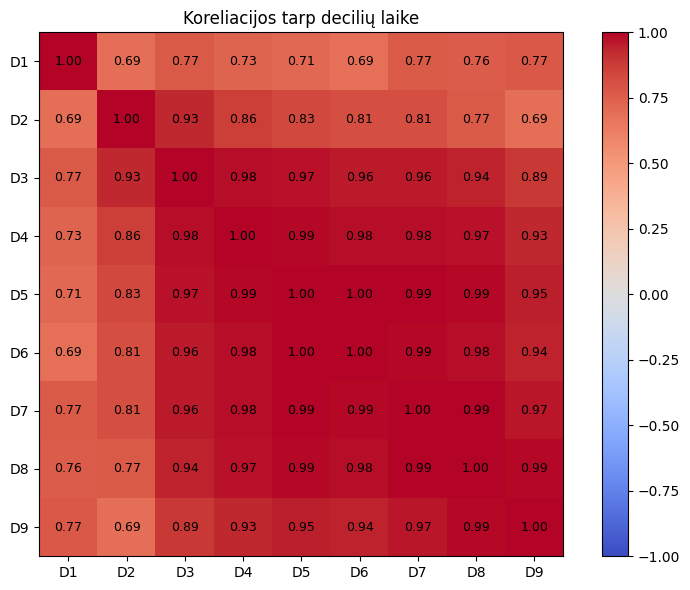

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

for name, df in new_df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KWH"
    kwh_fields = [col for col in df.columns if col.startswith('KWH')]
    
    # Sukuriame duomenų rinkinį tik su KWH laukais
    if kwh_fields:  # Jei yra tokių laukų
        kwh_data = df[kwh_fields]
        
        # Nustatome slenksčius
        quantiles = kwh_data.quantile([i / 10 for i in range(1, 10)])
        
        # Nupiešiame grafiką
        plt.figure(figsize=(8, 6))
        for quantile in quantiles.index:
            plt.plot(kwh_fields, quantiles.loc[quantile], label=f'Q{int(quantile * 100)}', marker='o')
        
        # Pritaikome grafikui pavadinimą ir ašis
        # plt.title(f"Vartotojų pasiskirstymas {name[:4]} m. {name.split('-')[1].split('_')[0]} p. {name.split('-')[1].split('_')[1]}*")
        duomenys=name.split('_')
        plt.title(f"{duomenys[1].capitalize()}, {duomenys[0]} m.")
        plt.xlabel("Mėnesiai")
        plt.xticks(ticks=kwh_fields, labels=[col.replace("KWH", "") for col in kwh_fields]) # !!!
        plt.ylabel("kWh (log skalė)")
        plt.yscale('log')  # Logaritminė Y skalė
        plt.legend(title="Vartotojų dalis")
        plt.grid(True)
        
        # Parodome grafiką
        plt.show()
        
        show_deciles_HM(calculate_deciles(df))

# print('________________________\n* Regionų grupių kodai:')
# print('  VKK - Vilnius, Kaunas, Klaipėda')
# print('  ŠPAM - Šiauliai, Panevėžys, Alytus, Mažeikiai')
# print('  kiti - mažiausių Lietuvos regionų vartotojai')

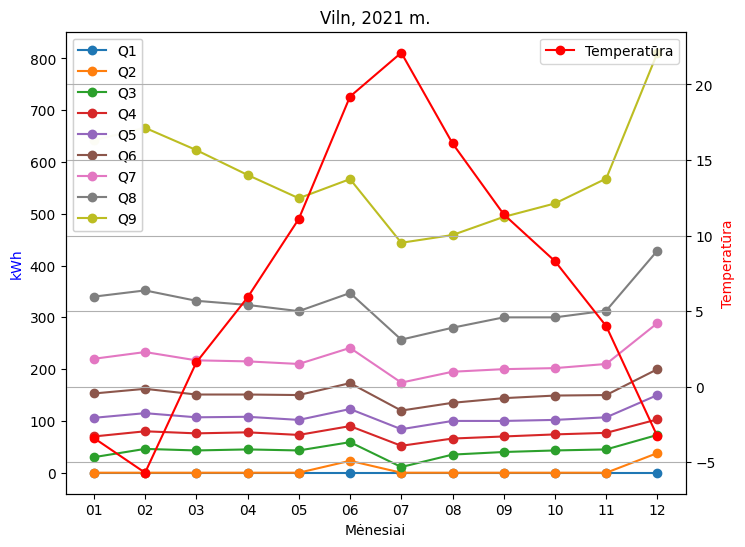

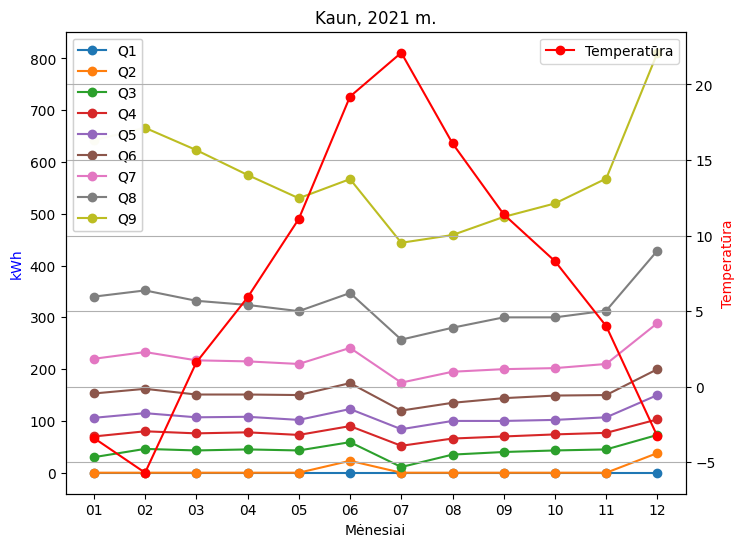

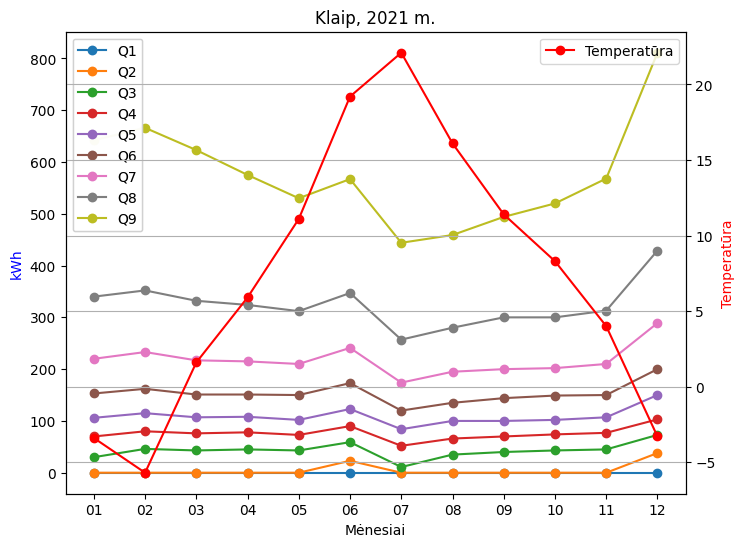

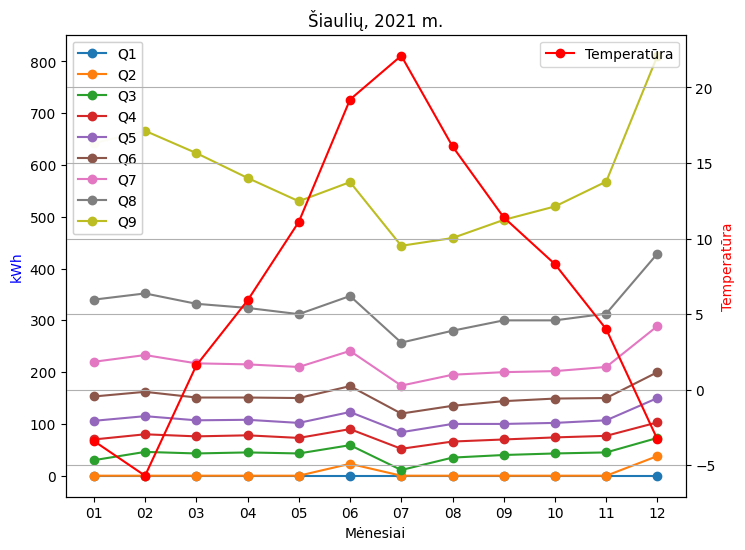

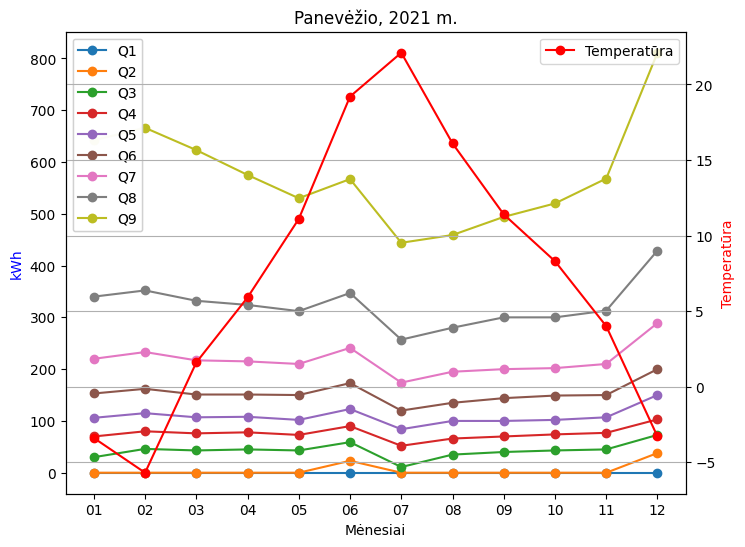

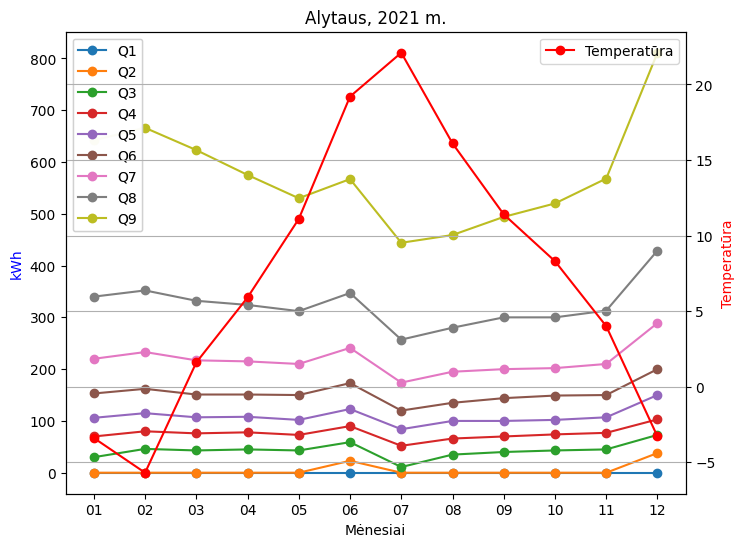

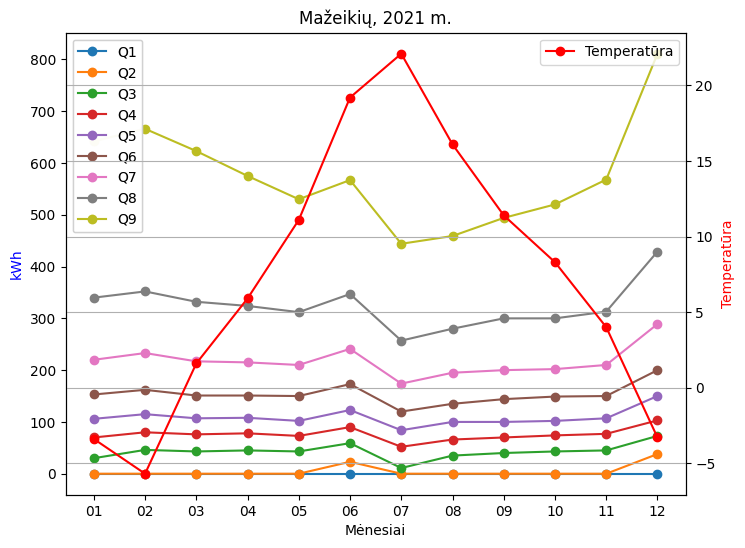

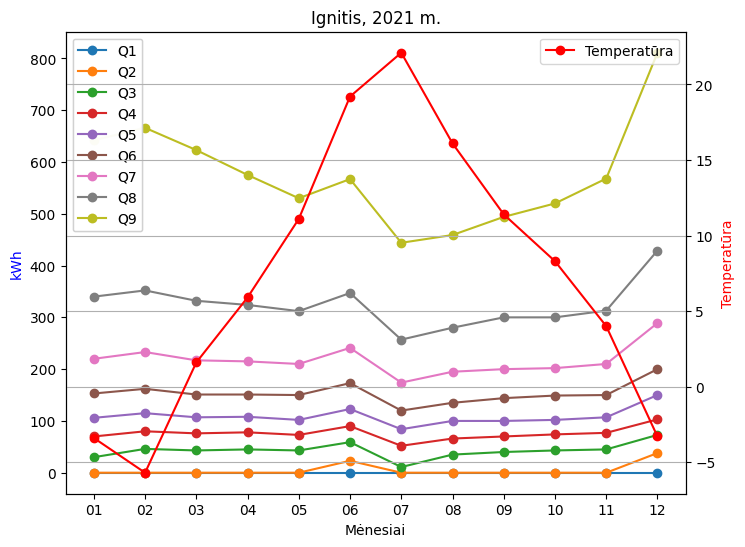

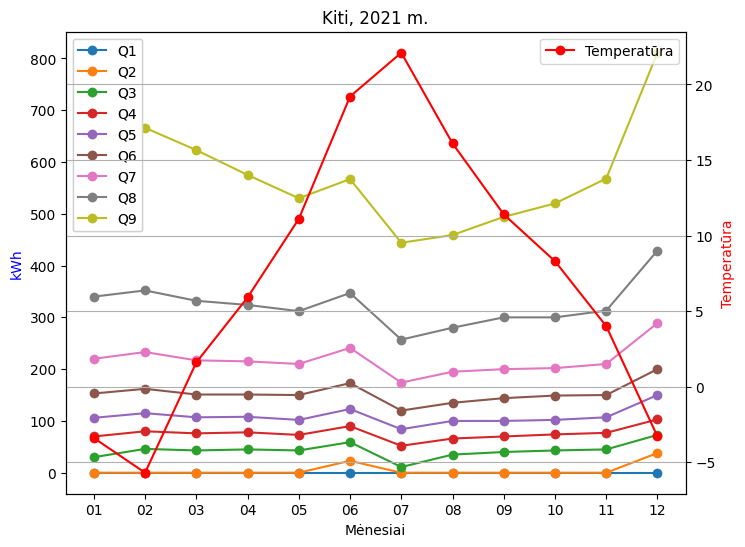

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

orai_dict ={'01': -3.4, '02': -5.7, '03': 1.6, '04': 5.9, '05': 11.1, '06': 19.2,
            '07': 22.1, '08': 16.1, '09': 11.4,'10': 8.3, '11': 4.0,  '12': -3.3}

orai_df = pd.DataFrame(list(orai_dict.items()),columns=['Mėnuo','Temperatūra'])

for name, df in new_df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KWH"
    kwh_fields = [col for col in df.columns if col.startswith('KWH')]
    
    # Sukuriame duomenų rinkinį tik su KWH laukais
    if kwh_fields:  # Jei yra tokių laukų

        # Tuo atveju x ašies reikšmes galima sunumeruoti nuo 1 iki len(kwh_fields)
        x_values = list(range(1, len(kwh_fields) + 1))

        fig, ax1 = plt.subplots(figsize=(8, 6))

        # Braižome kWh kreives ant ax1
        for quantile in quantiles.index:
            ax1.plot(x_values, quantiles.loc[quantile], label=f'Q{int(quantile * 10)}', marker='o')

        # Nustatome x ašies etiketes: sunumeruoti x_values, bet rodyti mėnesių pavadinimus
        ax1.set_xticks(x_values)
        ax1.set_xticklabels([col.replace("KWH", "") for col in kwh_fields])
        ax1.set_xlabel("Mėnesiai")
        ax1.set_ylabel("kWh", color='blue')

        duomenys = name.split('_')
        ax1.set_title(f"{duomenys[1].capitalize()}, {duomenys[0]} m.")

        # Sukuriame antrą y ašį – temperatūros grafikui
        ax2 = ax1.twinx()
        # Jei orai_df['Mėnuo'] atitinka tą pačią tvarką kaip kwh_fields, galime naudoti tą patį x_values.
        ax2.plot(x_values, orai_df['Temperatūra'], color='red', marker='o', label='Temperatūra')
        ax2.set_ylabel("Temperatūra", color='red')

        # # Sujungiame legendas iš abiejų ašių
        # lines1, labels1 = ax1.get_legend_handles_labels()
        # lines2, labels2 = ax2.get_legend_handles_labels()
        # ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', title="Vartotojų dalis")

        # Sukuriame legendą iš ax1 duomenų ir pridedame ją prie ax1
        legend1 = ax1.legend(loc='upper left') #, title="KWH duomenys")
        ax1.add_artist(legend1)  # Pridedame pirmąją legendą kaip meninį objektą

        # Sukuriame antrą legendą, kuri rodys ax2 duomenis
        legend2 = ax2.legend(loc='upper right') #, title="Temperatūra")

        plt.grid(True)
        plt.show()
    
     


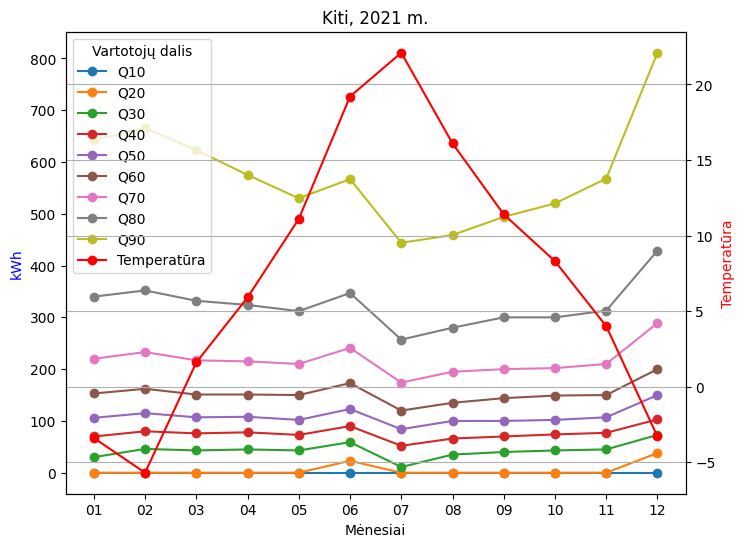

In [25]:
import matplotlib.pyplot as plt

# Tarkime, kad kwh_fields yra tokia struktūra:
# pavyzdžiui, ['KWHsausis', 'KWHvasaris', 'KWHkovas', ...]
# Tuo atveju x ašies reikšmes galima sunumeruoti nuo 1 iki len(kwh_fields)
x_values = list(range(1, len(kwh_fields) + 1))

fig, ax1 = plt.subplots(figsize=(8, 6))

# Braižome kWh kreives ant ax1
for quantile in quantiles.index:
    ax1.plot(x_values, quantiles.loc[quantile], label=f'Q{int(quantile * 100)}', marker='o')

# Nustatome x ašies etiketes: sunumeruoti x_values, bet rodyti mėnesių pavadinimus
ax1.set_xticks(x_values)
ax1.set_xticklabels([col.replace("KWH", "") for col in kwh_fields])
ax1.set_xlabel("Mėnesiai")
ax1.set_ylabel("kWh", color='blue')

duomenys = name.split('_')
ax1.set_title(f"{duomenys[1].capitalize()}, {duomenys[0]} m.")

# Sukuriame antrą y ašį – temperatūros grafikui
ax2 = ax1.twinx()
# Jei orai_df['Mėnuo'] atitinka tą pačią tvarką kaip kwh_fields, galime naudoti tą patį x_values.
ax2.plot(x_values, orai_df['Temperatūra'], color='red', marker='o', label='Temperatūra')
ax2.set_ylabel("Temperatūra", color='red')

# Sujungiame legendas iš abiejų ašių
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', title="Vartotojų dalis")

plt.grid(True)
plt.show()


In [26]:
print(kwh_fields)
print(orai_df['Mėnuo'])
print(x_values)

['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']
0     01
1     02
2     03
3     04
4     05
5     06
6     07
7     08
8     09
9     10
10    11
11    12
Name: Mėnuo, dtype: object
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [13]:
import re

txt='Viens-du, trys ir_keturi!'
print(txt)
print(re.split(r'[^\w]+', txt))

Viens-du, trys ir_keturi!
['Viens', 'du', 'trys', 'ir_keturi', '']
